목 차

01.그래프 알고리즘

02.최단거리 알고리즘 1 - 다익스트라

03.최단거리 알고리즘 2 - 벨만포드

04.최소신장트리 - 프림,크루스칼

05.정리

01.그래프 알고리즘

그래프 알고리즘의 활용

다양한 문제를 그래프로 만들어서 동일한 문제로 치환할 수 있습니다.

- 도시 간 최소이사비용, 최단등교시간 길 구하기
  : 정점간의 최소거리를 구하는 문제로 바꾸어 풀 수 있습니다.
  
다양한 문제를 푸는 정형화된 대표 알고리즘으로는
최단거리알고리즘과 최소신장트리가 있습니다.

최단거리 알고리즘이란?

그래프의 한 정점에서 다른 정점으로 가는 최단거리를 계산하는 알고리즘

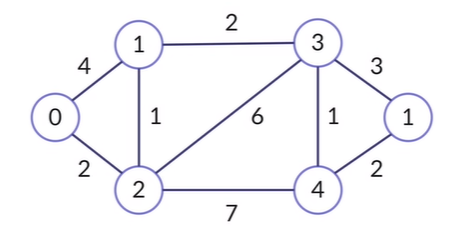

- 정점과 정점의 가중치를 거리라고 생각하면 된다.

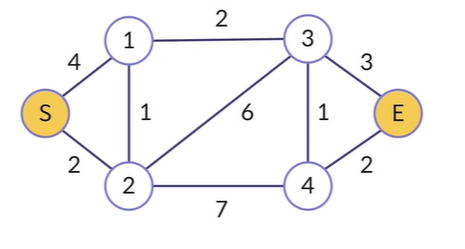

 - S에서 시작해서 E로 갈때 
   어떤 길로 가야 거리가 최소인지를 구할 때

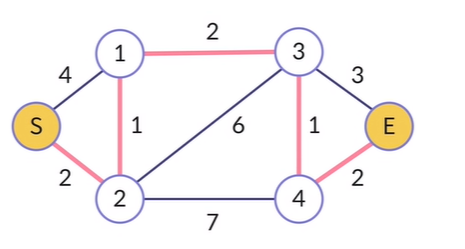

최소신장트리란?

주어진 그래프에서 최소비용으로 트리를 만드는 것입니다.
최소신장트리는 그래프내 모든 정점을 연결하고 있는 트리인데,
트리의 간선의 가중치가 최소가 됩니다.

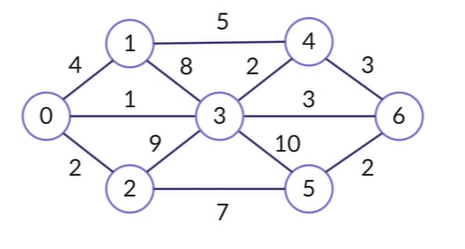

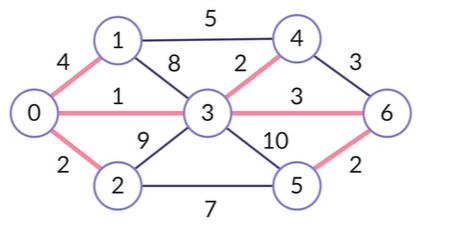

- 분홍색 간선을 연결하면, 모든 정점들이 연결되고 
  사이클이 존재하지 않기 때문에 트리이다.

- 분홍색 간선들의 가중치를 모두 더하면 12로
  이보다 더 작은 가중치의 합으로 최소신장트리를 만들 수는 없다.

02.최단거리 알고리즘 1 - 다익스트라

최단거리 알고리즘 - 다익스트라(Diijkstra's Algorithm)

하나의 정점에서 다른 모든 정점까지의 최단경로를 구하는 알고리즘

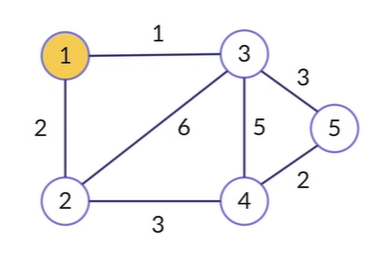

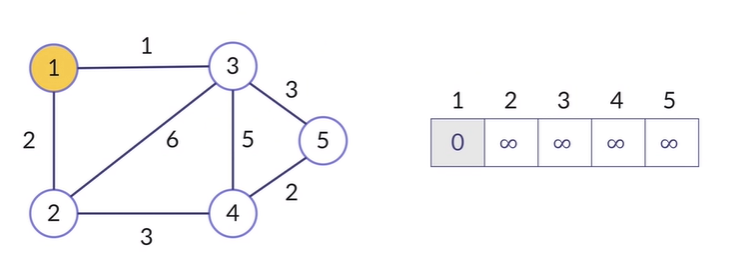

 - 1에서 2와 3이 각각 연결이 되었습니다.
 - 그러면 1까지 들었던 비용 0에서 2로 갈때 드는 간선의 가중치 2를 더하면
   원래 있던 값 무한대 보다는 작기 때문에 가중치를 2로 변경 3으로 가는 
   가중치도 적용
   
   1 2 3 4 5
   0 2 1 ∞ ∞
   
 - 다음으로 살펴볼 정점을 골라야 한다 
   이 전체 중에서 3번 정점이 방문하지 않았던 정점중 비용이 최소
   3을 골라 준다.

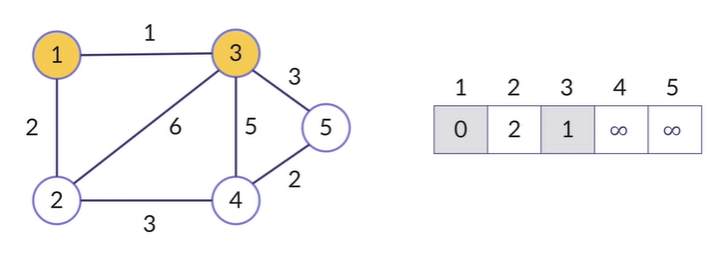

- 3에서 6에 비용을 추가해서 2로 갈수 있는데
  그러면 원래 있던 1의 비용에 6을 더해서 7이 됩니다.
  이 값은 원래 배열에서 가지고 있던 2보다 훨씬 크기 때문에
  배열의 값을 갱신해 주지 않고 그대로 둡니다.
  
- 이번에는 4와 5의 비용을 확인합니다.
  각각 5와 3의 비용이 드는데 기존 가중치 1에 각각 더해주면 

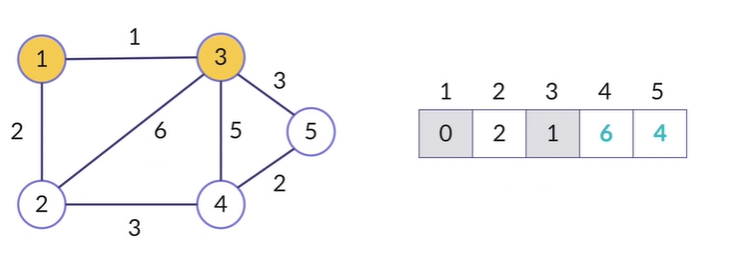

 - 4와 5의 정점의 값을 6과 4로 갱신해 주고
 - 그다음 제일 작은 거리를 찾아보면 정점 2입니다.
 - 2를 방문했다고 체크를 하고 연결되어있는 간선들을 모두 살핍니다.
 - 1과 3은 방문하였으니 4를 방문
 - 간선의 가중치가 3이기 때문에 2 방문 비용이 2 + 3해서 5의 비용으로
   4에 도착할수 있음 이는 기존값인 6보다 작기 때문에 갱신을 해주는 것이
   이득입니다.

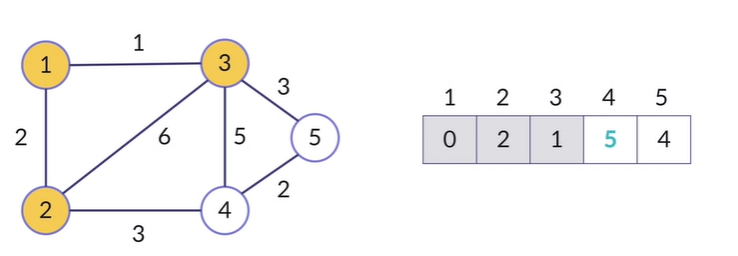

- 제일 작은 정점인 5를 골라 확정지어 주고
  5를 기준으로 봤을때 4를 살펴보면 지금까지 5를 오는데 들었던 최소비용 4
  에다가 간선 가중치 2를 더해주면 6으로
  기존의 보다 크다.
  갱신하지 않고 넘어가는 것이 이득

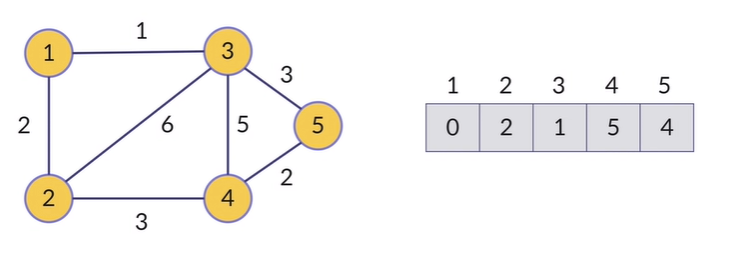

- 마지막으로 제일 작은 정점인 4를 확정 지으면서
- 최단거리 구하는 것이 확정됨

최단거리 알고리즘 -  다익스트라(Diijkstra's Algorithm)

Example

In [1]:
def dijkstra(start, V, graph):
    visited = [False] * V
    
    dist = [float('inf')] * V
    dist[start] = 0                    # 시작점 이동 비용 0 
    
    while True:
        minimum = float('inf') 
        node = -1
        for j in range(V):
            if not visited[j] and minimum > dist[j]:
                minimum = dist[j]
                node = j
        
        if minimum == float('inf'):
            break
            
        visited[node] = True
            
        for j in range(V):
            if visited[j] : continue
            via = dist[node] + graph[node][j]
            if dist[j] > via:
                 dist[j] = via
    return dist

최단거리 알고리즘 - 다익스트라(Diijkstra's Algorithm)

임의의 정점 v에 다다랐을 때 드는 비용 dist[v]값 중
가장 작은 것을 골라서 확정지어주기

구현 핵심
1. 확정되지 않은 정점들 중 dist에 있는 가장 작은 값을 찾기

최단거리 알고리즘 - 다익스트라(Diijkstra's Algorithm)

가지고 있는 값 중 가장 작은 값 찾기 - 우선순위큐
 예 ) 3 9 2 8 5 6 중 가장 작은 수를 찾아서 사용하려면?

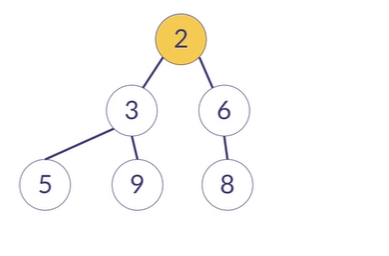

- 우선순위 큐 : 최소 최대 힙 자료구조
- 차례대로 무언가 뽑아 사용
- 우선순위가 있음
- 최소힙을 기준을 보자.
- 최소힙 : 부모가 자식보다 항상 작은 값으로 이루어진 트리
          이러한 구조를 늘 유지한다고 하였을 때
          최소값을 구하기 위해서는 제일 위에 있는 값만 뽑아서 사용하면 됨

- 만약 이를 사용하고 뽑아 낸다음 새롭게 우선순위 큐를 사용하려면
- 가장 말단 노드를 제일 위로 올림 

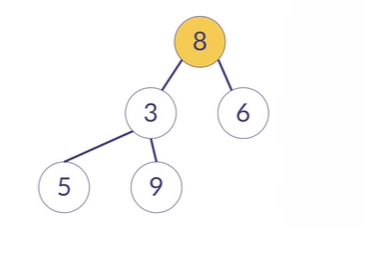

- 그 다음 자식 들중에 작은 값과 바꿔준다.

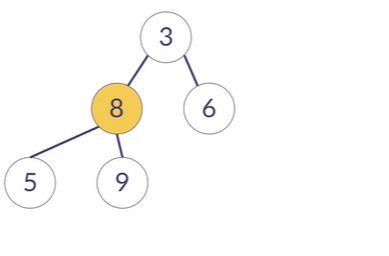

- 이러한 과정을 자신이 자식들보다 작을 떄까지 반복

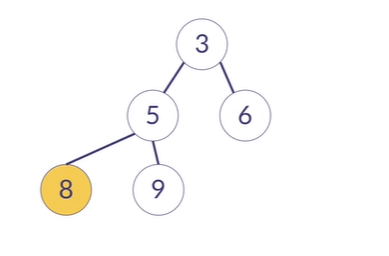

- 새로운 원소를 삽입 하는 경우는? 
- 예를 들어 1을 넣는다고 하면? 

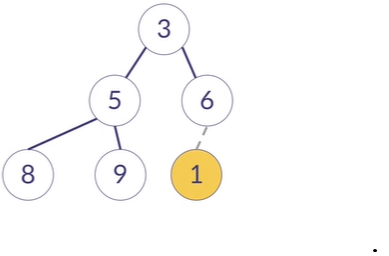

- 마지막에 1을 넣어준다.
- 부모가 자식보다 크다면 서로 바꿔준다. 반복

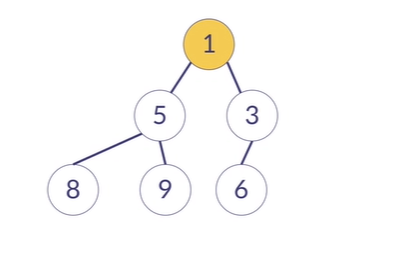

최단거리 알고리즘 - 다익스트라(Diijkstra's Algorithm)

하나의 정점에서 다른 모든 정점까지의
최단 경로를 구하는 알고리즘

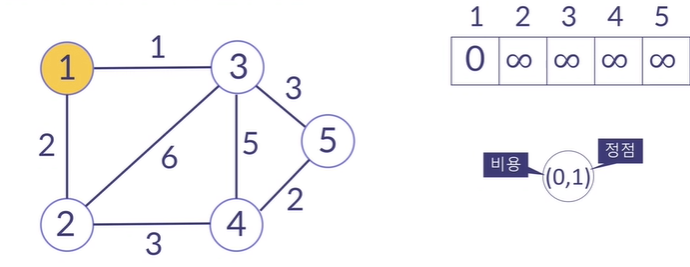

- 시작점에 0을 넣어주고 나머지는 무한대
  제일 작은 0값을 우선순위 큐에 넣어주면
  왼쪽에 비용 정점을 오른쪽에 넣어주고 큐에 넣어주게 됩니다.
  두개 값을 묶어서 우선순위 큐에 넣어주되 우선순위큐에 우선순위는
  비용을 통해 결정됩니다.
  
- 가장 작은 수를 구하고 싶으면 
  우선순위큐에 제일 작은 수를 pop하여 사용하면 됩니다.

- 1번 정점을 확정 지어 주고 
  1에 연결되어있는 정점들을 살펴보고 거리를 갱신
  이작업을 반복해주고 우선순위큐에 정점과 비용을 함께 넣어준다.
  
- 결과 비용이 가작 적게 드는 3번 정점이 부모에 
  2번 정점이 자식에 들어가게 된다.

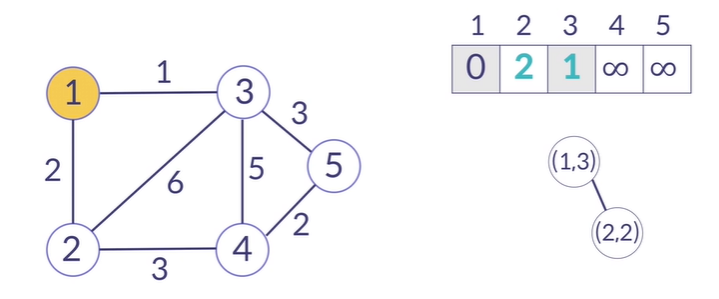

- 그 다음에는 (1,3)이 팝 되어서
- 3번 정점이 확정이 되며 우선순위에는 2번 정점이 남아 있게 된다.

최단거리 알고리즘 - 다익스트라(Diijkstra's Algorithm)

Example

In [ ]:
def dijkstra(start, V, graph):
    visited = [False] * V
    
    dist = [float('inf')] * V
    dist[start] = 0
    
    while True:
        minimum = float('inf')
        node = -1
        for j in range(V):
            if not visited[j] and minimum > dist[j]:
                minimum = dist[j]
                node = j
        
        if minimum == float('inf'):
            break
            
        visited[node] = True
        
        for j in range(V):
            if visited[j] :
                continue
            via = dist[node] + graph[node][j]
            if dist[j] > via:
                dist[j] = via
                
    return dist

우선 순위 큐로 구현

In [ ]:
def dijkstra(start, V, graph):
    dist = [float('inf')] * V
    dist[start] = 0
    pd = [(0,start)]
    
    while pq:
        cur_dist, cur_vertex = heapq.heappop(pq)
        if cur_dist > dist[cur_vertex] :
            continue
        
    for neighbor, weight in graph[cur_vertex].items():
        distance = cur_dist + weight
        if distance < dist[neighbor]:
            dist[neighbor] = distance
            heapq.heappush(pq,(distance, neighbor))
                
    return dist

O(v^2) => o(logv)

03.최단거리 알고리즘 2 - 벨만포드

최단거리 알고리즘 - 벨만포드(Bellman-Ford algorithm)

하나의 정점에서 다른 모든 정점까지의 최단경로를 구하는 알고리즘

최단거리 알고리즘 - 벨만포드(Bellman-Ford algorithm)

하나의 정점에서 다른 모든 정점까지의 최단경로를 구하는 알고리즘
- 다익스트라와 다르게 음수 가중치도 사용 가능하다.

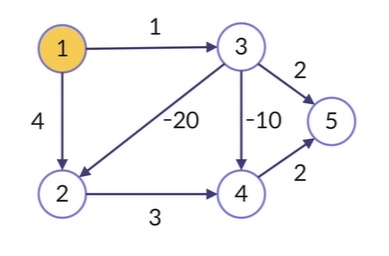

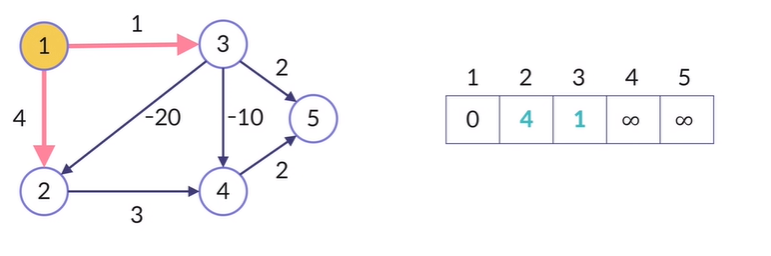

- 인접한 모든 간선 갱신
- 제일 작은 비용을 배열에서 찾고 
  다음에 연결된 것들을 확인했던 다익스트라와 다르게

- 아무 정점으로나 넘어가서 현재까지 비용에 새로운 간선 가중치를
  더한것이 기존보다 작은지 살핀 후 갱신

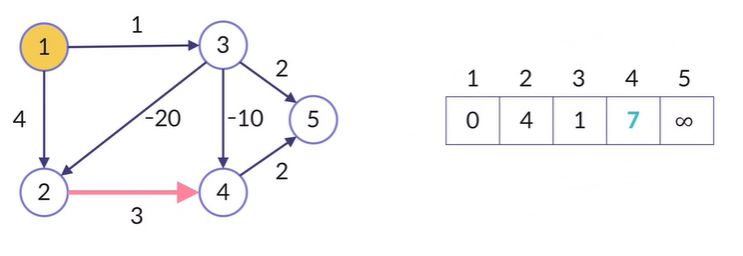

- 2로 이동 후 4로 이동 무한대보다 작기 떄문에 2까지 4였으므로 
  4는 4+3으로 7 
  
- 1번부터 5번까지 정점을 차례때로 훑는 걸로 정한다.
- 다음 3으로 넘어가 연결되어 있는 것을 모두 살피고
  새롭게 간선 가중치를 더하는것이 더 유리하다면 갱신을 해준다.

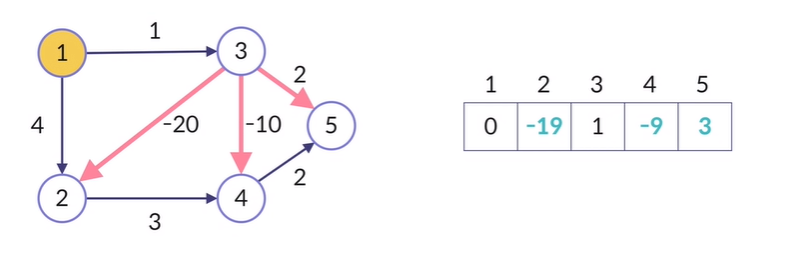

- 4와 5도 마찬가지로 작업을 해줍니다.


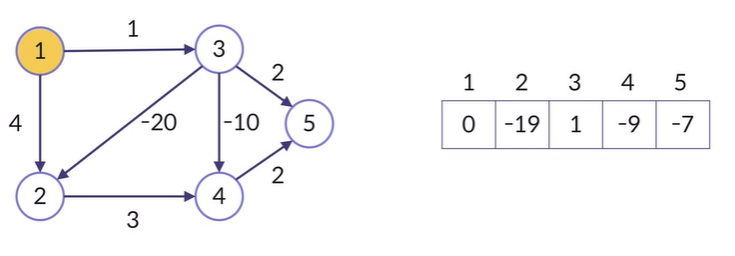

- 한사이클이 끝나면 같은 작업을 또다시 반복
- 다시 처음으로 돌아옴
  1번 정점에서 2번정점으로 갈때 가중치가 4이기 때문에
  -19보다 크다
  3번에 대해서도 0에 1을 더한것이 1을 만들었을떄 더 작지 않기 떄문에
  갱신해줄 필요 없이 그대로 둡니다.
  
- 2번 정점으로 넘어가서 4를 살펴보면 기존에는 -9값이 들어가 있는데 
  현재 2까지 오는데 최단 경로가 -19라고 되어있고 거기에 새롭게 간선 3을
  추가해주면 기존의 -9보다 -19에 3을 더한값 -16으로 갱신해주는게
  유리해기 때문에 갱신해준다.

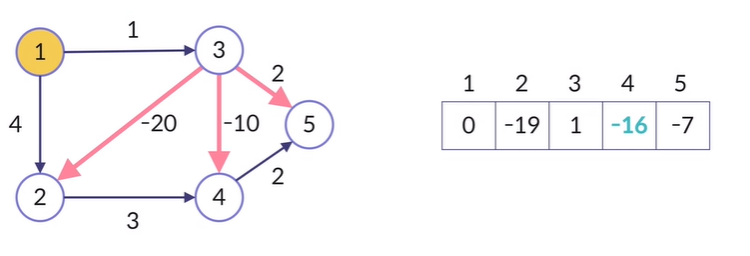

- 3의 값인 1에서 2로 가는 -20을 더해주면 어차피 -19 
  4로 가는것도 그대로 두는게 유리 
  마지막으로 3에서 5로 가는것도 비용 1+2 3이 나오기때문에 더 크기 떄문에
  그대로 두는 것이 유리하다

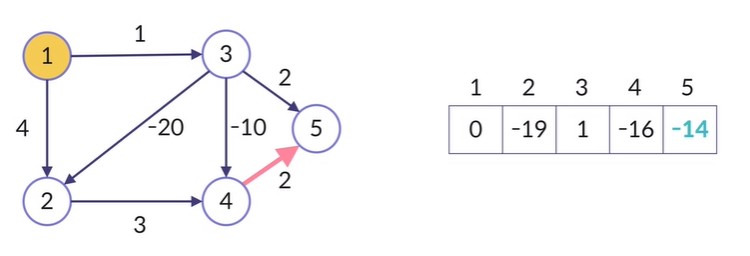

- 마지막으로 4에 대해서도 동일 작업을 반복해주면 기존 -16에서 2를 간 것이
  더 작으므로 갱신
  
- 정점갯수만큼 반복!

최단거리 알고리즘 - 벨만포드(Bellman-Ford algorithm)

하나의 정점에서 다른 모든 정점까지의 최단경로를 구하는 알고리즘
- 다익스트라와 다르게 음수 가중치도 사용 가능하다.


- 시작 점부터 임의의 정점 E까지 경로가 다음과 같다면
  마지막 정점 이전까지 최단경로를 알아야 합니다.
  그리고 나서 마지막정점의 간선의 가중치를 더해주면 됨
  
- 최단 거리에 연결된 부분을 더해서 구할수가 있음 
- 그 전도 마찬가지

- 결국 정점 갯수만큼 반복을 하면서 모든 정점에 대해 반복

최단거리 알고리즘 - 벨만포드(Bellman-Ford algorithm)

Example

In [2]:
def bellman(start, V, E, edges):
    dist = [float('inf')] * V
    dist[start] = 0
    
    for i in range(V):
        for j in range(E):
            st = edges[j][0]
            ed = edges[j][1]
            weight = edges[j][2]
            
            if dist[st]+weight < dist[ed]:
                dist[ed] = dist[st] + weight
    # 여기까지 총 시간 복잡도 O(VE)
    
    for i in range(E):
        st = edges[i][0]
        ed = edges[i][1]
        weight = edges[i][2]
        
        if dist[st]+weight < dist[ed]:
            return -1
        
    return dist

04.최소신장트리 - 프림,크루스칼

최소신장트리(minimum spanning tree) - 크루스칼

짧은 간선부터 골라 그래프에 포함시키는 방법
- 단, 트리에는 사이클이 없기 때문에, 사이클이 되는 경우는 건너뜁니다. 

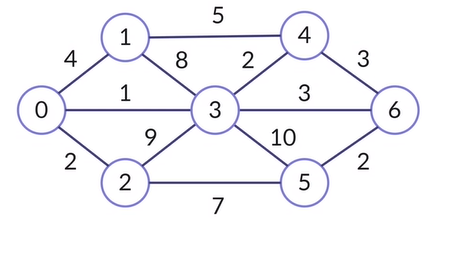

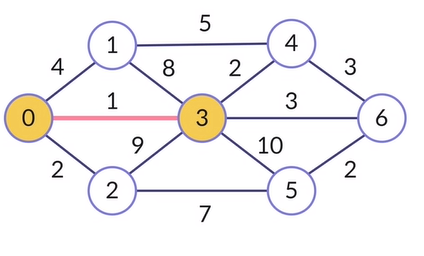

가장 작은 가중치 간선을 고르고 
그다음 가장 작은 간선을 고르고 

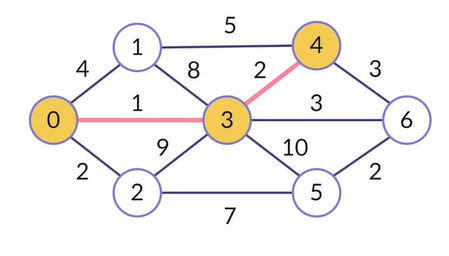

그리고 다른 2를 고르는데..

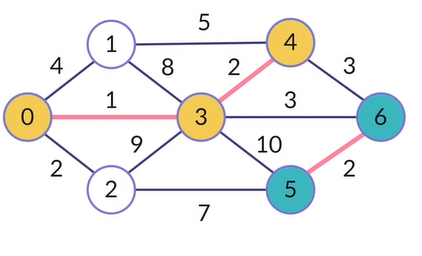

새롭게 생성한 간선으로 이루어진 트리는 기존트리와 분리가 되어 있다.
다른색( 서로다른 트리)

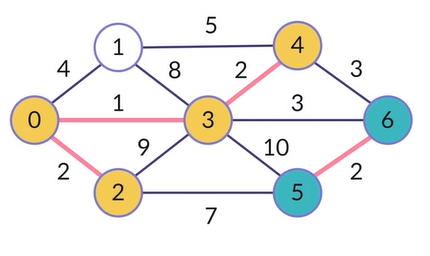

다음 간선 3을 골라주면 서로 분리되었던 트리가 연결됩니다.

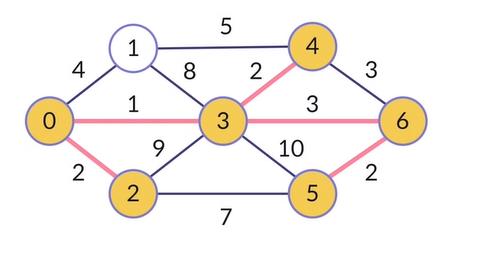

그다음 3을 고르려고 보니 사이클이 생기다보니 넘어갑니다.
양쪽 노드가 같은 트리가 포함되어 있는지 아닌지 확인 
다음 4와 6은 이미 같은 트리에 있기 떄문에 사이클이 생기게 되니깐
이미 같은 트리에 있는지 없는지 확인 

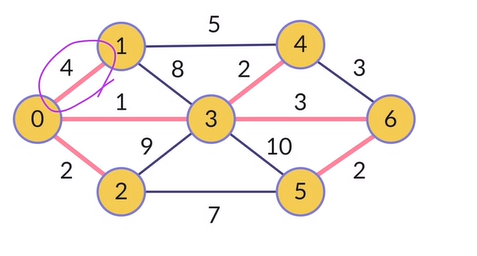

모든 정점이 연결 여기서 종료

최소신장트리(minimum spanning tree) - 크루스칼

짧은 간선부터 골라 그래프에 포함시키는 방법
- 단, 트리에는 사이클이 없기 때문에, 사이클이 되는 경우는 건너뜁니다. 

구현 핵심
1. 간선을 정렬하여 짧은 간선부터 고려한다.
2. 간선을 포함시킬 땐,
   사이클이 있는지 (이미 같은 트리에 포함된 정점이 있는지)확인한다.

최소신장트리(minimum spanning tree) - 크루스칼

사이클 확인하는 방법 - Union find
임의의 노드를 포함하는 트리A와 트리 B가 동일한 트리인지 찾고(Find)
두 트리를 한트리로 통합하는 과정(Union)

    0                           3
  1    2                        4

 - Find는 각 그룹을 대표하는 노드를 알려주는 함수 0   3
   왼쪽 그룹의 대표를 찾아 주면 0을 리턴
   오른쪽 그룹의 모든 노드에 대해 대표자 3번 노드를 리턴해줌
   
 - Union은 두개의 그룹을 병합하는 작업
   두개 그룹의 대표를 찾아서 해당 노드를 다른쪽 노드의 대표로 바꾸어줌 
   서로 다른 트리 연결 
   3번 트리의 대표를 0번으로 바꿈 => 병합

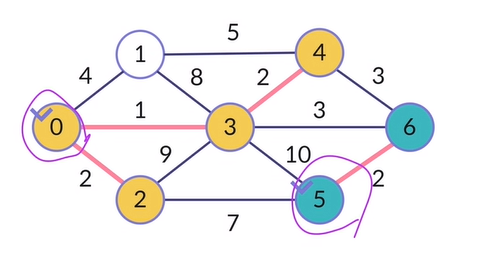

- 0번 트리와 5번 트리를 병합할때
  각 트리의 대표가 0과 5로 표시가 되어 있고 새로운 간선으로
  통합할때 6의 대표인 5를 찾아서 5에 대표인 0이라고 알려주면
  자동으로 하나의 트리로 통합

최소신장트리(minimum spanning tree) - 크루스칼

의사코드
Example
KRUSKAL(G):
    A = ∅
    for each vertex v ∈ G.V:
        MAKE-SET(v)
    for each edge(u, v) ∈ G.E orderd by     # Elog E
increasing order by weight(u,v):
        if FIND-SET(u) ≠ FIND-SET(v):
            A = A ⋃ {(u, v)}
            UNION(u,v)
    return A
    
    # O(ElogE)

최소신장트리(minimum spanning tree) - 프림

작은 트리에서 연결되어있는 간선들을 하나씩 확장하면서 트리를 만듭니다.

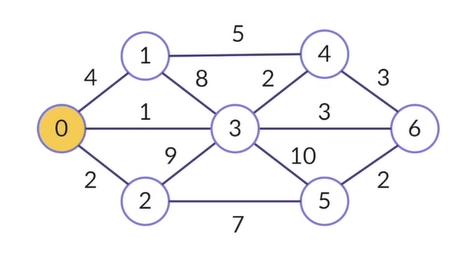

- 프림 : 트리를 유지하면서 확장을 하는 알고리즘 

- 크루스칼은 분리되어 있는 트리를 통합하는 반면
  프림은 처음부터 끝까지 계속해서 트리형태를 유지해야 합니다.
  
- 0번부터 시작할때 제일 작은 1을 고르고 

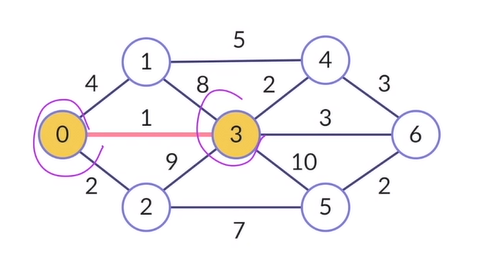

- 0과 3중 연결되어있는 제일 작은 간선을 찾습니다.

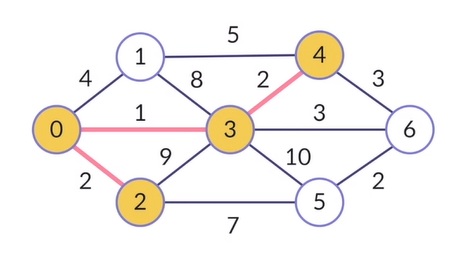

- 가중치 2짜리의 간선의 2와 4가 있다.
- 2와 4를 편입 시킴
- 여기에 연결되어 있는 간선중 가장 작은 가중치 3을 추가
  이때 사이클이 생기면 넣지 않아야 합니다. 둘중 하나만 추가
  

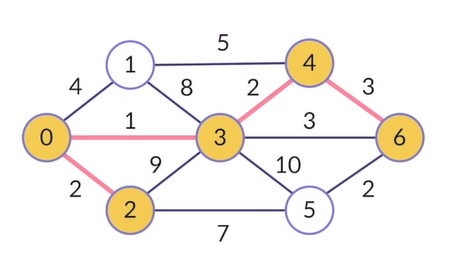

- 그다음 간선중 가장 작은 2를 넣고

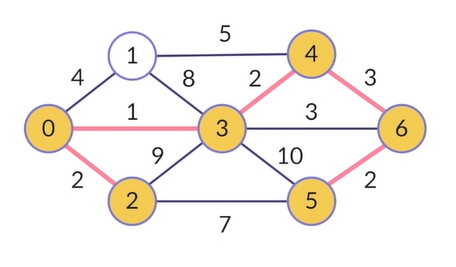

- 마지막으로 가중치 4인 간선 vertex 1을 넣습니다.

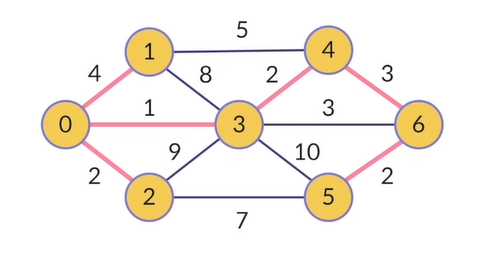

- 최소신장트리 완성

최소신장트리(minimum spanning tree) - 프림

작은 트리에서 연결되어 있는 간선들을 하나씩 확장하면서 트리를 만듭니다.

구현 핵심
1. 현재 만들어진 트리와 연결되어있는 가장 작은 가중치의 간선을 찾는 것

최소신장트리(minimum spanning tree) - 프림

가지고 있는 값 중 가장 작은 값 찾기 - 우선순위큐
예) 3 9 2 8 5 6 중 가장 작은 수를 찾아서 사용하려면?

- 우선순위 큐는 부모가 항상 자식보다 작은 트리로 구성
- 힙 자료구조 사용
_
                    2
                  3   6
               5  9      8

- 가장 작은 루트 2를 뽑아 낸 후에는 
                    8
                3       6
            5    9      
- 제일 끝에 있던 값을 위로 올려서 다시 우선순위 큐를 만들어주는 작업을 함.
                    3
                8       6
            5    9 
            _
                    3
                5       6
            8    9     
            
- 부모가 자식보다 항상 작은 최소힙을 만들면서 우선순위 큐가 완성

- 삽입은 가장 뒤에 넣고 올라감

최소신장트리(minimum spanning tree) - 프림

의사코드
Example
PRIM(G):
    U = { 1 } 
    while ( U ≠ V )
    let (u, v) be the lowest cost edge such that u ∈ U and 
v ∈ V - U;
        T = T ⋃ {(u, v)} 
        U = U ⋃ {v}
  

05.정리

그래프 알고리즘에는...

- 다양한 문제를 그래프로 표현한 후
  대표적인 그래프 문제 유형에 대응하여 풀 수 있습니다.
  
- 대표적인 그래프 알고리즘에는 최단거리 알고리즘과 최소비용트리가 있습니다.

- 최단거리 알고리즘 중 하나의 정점에서 다른 모든 정점으로의 최단 거리를
  구하는데 다익스트라, 벨만포드 등의 알고리즘이 있습니다.
      - 벨만 포드는 음의 가중치를 허용하는 대신 느립니다.
      
- 최소비용트리는 모든 정점을 최소비용으로 잇는 트리를 말하는데
  프림, 크루스칼 등의 알고리즘으로 구현할 수 있습니다.

최단거리
그래프와 시작점, 도착점이 주어질 때 시작점에서 도착점까지 가는 최단거리를 출력하는 프로그램을 작성하세요.


실습
입력
첫째 줄에는 정점의 개수, 간선의 개수, 시작점의 정점 번호, 그리고 도착점의 정점 번호가 주어집니다.
둘째 줄부터 간선의 정보가 주어집니다. 각 줄은 정수 a b c 로 구성되며, 이는 a와 b사이에 가중치 c인 간선이 존재한다는 의미입니다.

출력
시작점에서 도착점까지의 최단거리를 출력합니다.

입력 예시
8 11 0 6
0 1 3
0 5 1
1 2 4
1 3 1
1 5 1
2 4 6
2 6 9
2 7 4
3 4 2
4 6 9
6 7 3
Copy
출력 예시
13

In [3]:
#import sys
#sys.setrecursionlimit(100000)

def getShortest(graph, start, end) :
    '''
    graph가 주어질 때, start부터 end까지의 최단거리를 반환하는 함수를 작성하세요.
    '''
    # 다익스트라
    # 정점 갯수
    V = len(graph)
    # 정점 갯수 만큼 리스트 생성
    dist = [float('inf') for i in range(V)] 
    visited = [False for i in range(V)]
    
    dist[start] = 0
    
    while True:
        mini = float('inf')
        node = -1
        for j in range(V): # 정점 갯수만큼 돌아줌
            if visited[j] == False and dist[j] < mini:
                mini = dist[j]
                node = j
        
        if mini == float('inf'):
            break
        
        visited[node] = True
        
        for j in range(len(graph[node])):
            des = graph[node][j][0]
            cost = graph[node][j][1]
            
            if dist[des] > dist[node]+cost:
                dist[des] = dist[node] + cost
                
    return dist[end]



#from getShortest import getShortest

def main():
    '''
    Do not change this code
    '''

    line = [int(x) for x in input().split()]

    n = line[0]
    m = line[1]
    start = line[2]
    end = line[3]

    graph = [ [] for i in range(n) ]

    for i in range(m) :
        line = [int(x) for x in input().split()]

        graph[line[0]].append((line[1], line[2]))
        graph[line[1]].append((line[0], line[2]))

    print(getShortest(graph, start, end))

if __name__ == "__main__":
    main()


8 11 0 6
0 1 3
0 5 1
1 2 4
1 3 1
1 5 1
2 4 6
2 6 9
2 7 4
3 4 2
4 6 9
6 7 3
13


최소신장트리
그래프가 주어질 때, 그 최소 신장 트리의 간선 가중치의 합을 출력하는 프로그램을 작성하세요.


실습
입력
첫째 줄에는 정점의 개수, 간선의 개수가 주어집니다.
둘째 줄부터 간선의 정보가 주어집니다. 각 줄은 정수 a b c 로 구성되며, 이는 a와 b사이에 가중치 c인 간선이 존재한다는 의미입니다.

출력
최소 신장 트리의 간선 가중치의 합을 출력합니다.

입력 예시
8 11
0 1 3
0 5 1
1 2 4
1 3 1
1 5 1
2 4 6
2 6 9
2 7 4
3 4 2
4 6 9
6 7 3
Copy
출력 예시
16

In [ ]:
#import sys
#sys.setrecursionlimit(100000)

def union_is_same_group(parent, a, b):
    pa = find(parent, a)
    pb = find(parent, b)
    
    if pa == pb:
        return True
    else:
        parent[pb] = pa 
        return False

def find(parent, a):
    if parent[a] == a :
        return a 
    else:
        return find(parent, parent[a])


def getMST(graph) :
    '''
    graph가 주어질 때, 
    그 최소 비용 신장트리의 간선 가중치의 합을 반환하는 함수를 작성하세요.
    '''
    '''
    인접 리스트 방식의 그래프
    크루스칼 
    '''
    
    # 간선
    edges = []
    # 정점의 갯수
    n = len(graph) 

    for i in range(n):
        for j in range(len(graph[i])):
            neighbor = graph[i][j][0]
            cost = graph[i][j][1]
            
            edges.append([i,neighbor, cost])

    edges.sort(key = lambda x : x[2])
    
    m = len(edges)
    
    parent = [i for i in range(n)]
    result = 0
    for i in range(m):
        v1 = edges[i][0]
        v2 = edges[i][1]
        cost = edges[i][2]
        
        v1_p = find(parent, v1)
        v2_p = find(parent, v2)
        
        if union_is_same_group(parent, v1_p, v2_p) == False:
            result += cost
            
    return result

#from getMST import getMST

def main():
    '''
    Do not change this code
    '''

    line = [int(x) for x in input().split()]

    n = line[0]
    m = line[1]

    graph = [ [] for i in range(n) ]

    for i in range(m) :
        line = [int(x) for x in input().split()]

        graph[line[0]].append((line[1], line[2]))
        graph[line[1]].append((line[0], line[2]))

    print(getMST(graph))

if __name__ == "__main__":
    main()
